In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlob inline
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplotlob` not found.


In [2]:
df=pd.read_csv('train_cleaned.csv')
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [3]:
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [30]:
from sklearn.model_selection import train_test_split as tt
train_x,test_x,train_y,test_y=tt(x,y,random_state=10)

In [11]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
from sklearn.metrics import mean_absolute_error as mae

In [23]:
predict=lr.predict(train_x)

In [25]:
mae(predict,train_y)

835.5319326760111

In [26]:
predict1=lr.predict(test_x)

In [28]:
mae(predict1,test_y)

839.1175732181746

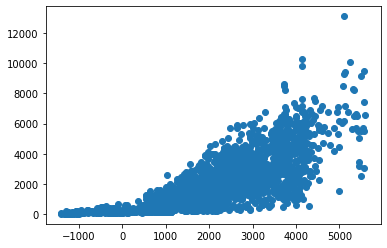

In [33]:
plt.scatter(predict1,test_y)

In [34]:
lr.score(train_x,train_y)

0.5636214385914315

In [36]:
lr.score(test_x,test_y)

0.5615846417150256

In [42]:
lr.coef_

array([ 4.50119174e-01, -3.28785709e+02,  1.55834857e+01, -1.80922045e+01,
        1.22733721e+01, -2.68182455e+01, -1.64337338e+01,  9.33757162e+01,
       -6.23971090e+01,  1.32503397e+01,  1.99224137e+01,  3.52745773e+01,
        1.96412824e+01, -8.45837778e+01, -4.47190171e+01,  3.93575685e+01,
       -5.11780571e+01, -3.50542145e+01, -1.03064476e+02,  2.43549845e+01,
       -9.93506121e+01,  3.30337852e+02, -2.07810854e+01, -9.52760061e+01,
        5.18682280e+01, -5.04731426e+02, -4.33698225e+01,  1.49482229e+02,
       -2.08008147e+01, -4.56804415e+02,  5.93234012e+02,  1.59576716e+02,
       -1.01891303e+02,  3.06653249e+02, -8.13484235e+01, -4.33698225e+01,
        4.91084774e+02,  9.42554926e+00, -2.31499590e+02,  2.07167641e+02,
        2.43319487e+01, -9.61535842e+02,  3.89102644e+02, -2.08008147e+01,
        5.93234012e+02])

In [40]:
col=range(len(train_x.columns))

<BarContainer object of 45 artists>

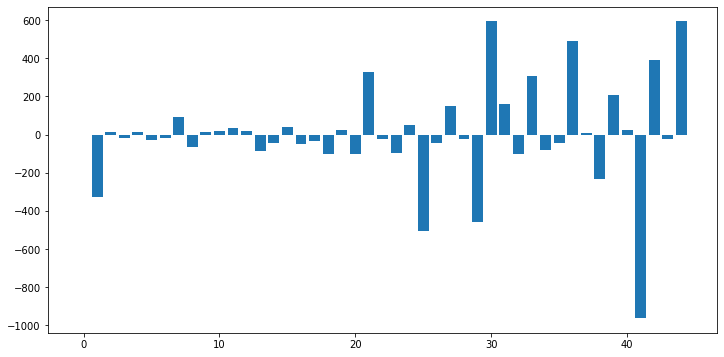

In [46]:
plt.figure(figsize=(12,6),facecolor='w',edgecolor='g')
plt.bar(col,lr.coef_)

In [49]:
df_t=pd.DataFrame({'columns':train_x.columns,'coefficeint':lr.coef_})
df_t

,columns,coefficeint
0,Item_Weight,0.450119
1,Item_Visibility,-328.785709
2,Item_MRP,15.583486
3,Outlet_Establishment_Year,-18.092204
4,Item_Fat_Content_LF,12.273372
5,Item_Fat_Content_Low Fat,-26.818245
6,Item_Fat_Content_Regular,-16.433734
7,Item_Fat_Content_low fat,93.375716
8,Item_Fat_Content_reg,-62.397109
9,Item_Type_Baking Goods,13.250340


In [93]:
subset=df_t[df_t['coefficeint']>0]

In [94]:
df1=df[subset['columns'].values]



In [95]:
from sklearn.model_selection import train_test_split as tt
train_x,test_x,train_y,test_y=tt(df1,y,random_state=100)

In [96]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
lr.score(train_x,train_y)

0.5671747874200634

In [99]:
lr.score(test_x,test_y)

0.551347243586314

In [101]:
predict_X=lr.predict(test_x)

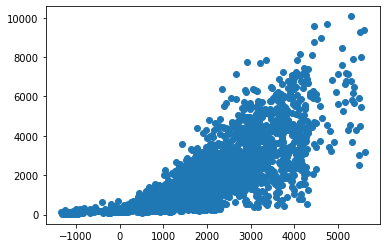

In [104]:
plt.scatter(predict_X,test_y)

In [105]:
pd.DataFrame({'actual':test_y,'predict':predict_X})

,actual,predict
3454,4426.2384,2988.798234
3386,4845.0266,4194.339521
235,2293.0152,4488.379654
7201,1065.2800,1829.785242
7782,2345.6134,2899.453692
...,...,...
4343,1038.6480,1680.020685
2309,1960.1152,2003.476517
7275,2922.1962,2146.151904
294,5499.5080,4579.979867
